<a href="https://colab.research.google.com/github/charlottevedrines/Java-Projects/blob/main/Assignment_8_vedrines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. EWMA Chart

A factory utilizes a very expensive and very precise pressure chamber in used to test materials compressive strength with high resolution, precision, and accuracy. The quality engineering division decided to sample the pressure diferences over time to see if the chamber was under statistical control. The device pressure variation process is almost perfectly normal (mean = 0, standard deviation = 0.96). The engineers chose a smoothing constant of 0.25 and a tolerance of 3 standard deviations.

- Calculate the zeta values and plot the corresponding EWMA chart.
- Was there a significant shift in the mean? If so, which samples are not in control?

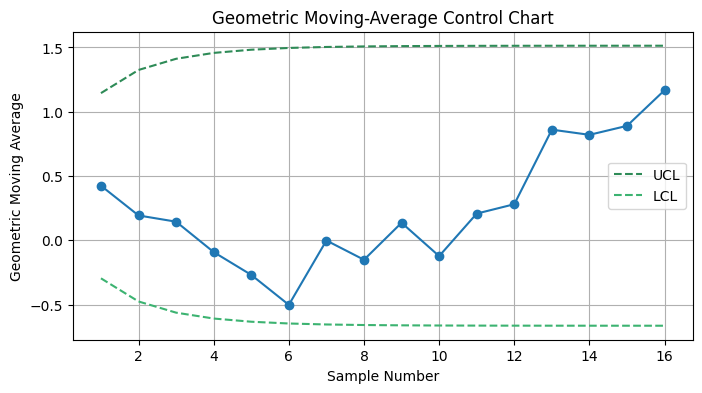

In [97]:
import numpy as np, matplotlib.pyplot as plt

xi = [1.0, -0.5, 0.0, -0.8, -0.8,
      -1.2, 1.5, -0.6, 1.0, -0.9,
      1.2, 0.5, 2.6, 0.7, 1.1,
      2.0]

z = 0

sample_mean = 0
sigma = 0.96
r = 0.25
n = 1


mean_sample_averages = np.mean(xi)

# Calculate the geometric moving averages
geometric_moving_averages = [mean_sample_averages]  # Initialize with G0 = mean X_bar
for i in range(1, len(xi)):
    Gt = r * xi[i] + (1 - r) * geometric_moving_averages[-1]
    geometric_moving_averages.append(Gt)

# Calculate the control limits
UCL_limit = []
LCL_limit = []
for i in range(1,len(xi)+1): # not sure how to arrange this line, could also do or i in range(len(xi))
    # Need to change these formulas to work for individual samples not sample means
    UCL = mean_sample_averages + 3 * sigma * np.sqrt((r * (1-(1-r)**(2*i)))/(n*(2-r)))
    LCL = mean_sample_averages - 3 * sigma * np.sqrt((r * (1-(1-r)**(2*i)))/(n*(2-r)))
    UCL_limit.append(UCL)
    LCL_limit.append(LCL)

# Plot the geometric moving-average control chart
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(xi) + 1), geometric_moving_averages, marker='o', linestyle='-')
plt.plot(range(1, len(xi) + 1), UCL_limit, label='UCL', color='seagreen', linestyle='--')
plt.plot(range(1, len(xi) + 1), LCL_limit, label='LCL', color='mediumseagreen', linestyle='--')
plt.title('Geometric Moving-Average Control Chart')
plt.xlabel('Sample Number')
plt.ylabel('Geometric Moving Average')
plt.legend()
plt.grid(True)
plt.show()


In [98]:
# Finding OOC samples
OOC = []
for i in range(len(geometric_moving_averages)):
  if geometric_moving_averages[i] < LCL_limit[i]:
    OOC.append(i)
  elif geometric_moving_averages[i] > UCL_limit[i]:
    OOC.append(i)
if len(OOC) > 0:
  print("Yes there was a significant shift in the mean, the OOC samples are", OOC)
else:
  print("There was no significant shift in the mean")

There was no significant shift in the mean


2. Moving Average Chart

A pharmaceutical company that manufactures Diphenhydramine hydrochloride pills wants to implement a control chart that is sensible to mean shifts to make sure the manufacturing process is in control. The company is concerned that their pills' average mass is becoming too imprecise. With that in mind they opted to implement a moving average chart for said task. The process mean is 25.15 mg, with a standard deviation of 0.19, and that the sample size is equal to 5.
- Plot the moving average chart
- Is the process in control? If not, which samples are not in control?

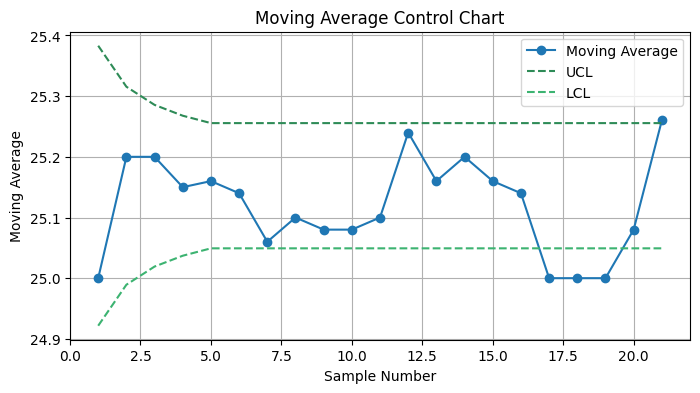

In [99]:
import numpy as np, matplotlib.pyplot as plt

z_arr = [25, 25.4, 25.2, 25.0, 25.2, 24.9,
           25.0, 25.4, 24.9, 25.2, 25.0, 25.7,
           25.0, 25.1, 25.0, 24.9, 25.0, 25.0, 25.1,
           25.4, 25.8]

sigma = 0.19 # piazza says that UCL, LCL takes population signma
mu_0 = 25.15 # no use for this ?
n = 5
width = 5 # from piazza


# Function to calculate moving average
def moving_average(data, width):
    moving_averages = []
    for i in range(len(data)):
        if i < width:
            moving_avg = np.mean(data[:i+1])
        else:
            moving_avg = np.mean(data[i-width+1:i+1])
        moving_averages.append(moving_avg)
    return moving_averages


# Function to calculate control limits
def UCL_limit(data, width):
    UCLs = []
    for i in range(len(data)):
        if i < width:
            UCL = [np.mean(data) + 3 * sigma / np.sqrt((i+1) * n)]
        else:
            UCL = [np.mean(data) + 3 * sigma / np.sqrt(n * width)]
        UCLs.append(UCL)
    return UCLs

# Function to calculate control limits
def LCL_limit(data, width):
    LCLs = []
    for i in range(len(data)):
        if i < width:
            LCL = [np.mean(data) - 3 * sigma / np.sqrt((i+1) * n)]
        else:
            LCL = [np.mean(data) - 3 * sigma / np.sqrt(n * width)]
        LCLs.append(LCL)
    return LCLs


# Calculate moving averages
moving_averages = moving_average(z_arr, width)

# Calculate control limits
sigma = 0.172  # Estimated standard deviation
UCLs = UCL_limit(z_arr, width)
LCLs = LCL_limit(z_arr, width)

# Plot moving averages and control limits
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(z_arr) + 1), moving_averages, label='Moving Average', marker='o', linestyle='-')
plt.plot(range(1, len(z_arr) + 1), UCLs, label='UCL', color='seagreen', linestyle='--')
plt.plot(range(1, len(z_arr) + 1), LCLs, label='LCL', color='mediumseagreen', linestyle='--')
plt.title('Moving Average Control Chart')
plt.xlabel('Sample Number')
plt.ylabel('Moving Average')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
# Finding OOC samples
OOC = []
for i in range(len(moving_averages)):
  if moving_averages[i] < LCLs[i]:
    OOC.append(i)
  elif moving_averages[i] > UCLs[i]:
    OOC.append(i)
if len(OOC) > 0:
  print("The process is out of control, the OOC samples are", OOC)
else:
  print("There was no significant shift in the mean")

The process is out of control, the OOC samples are [16, 17, 18, 20]


3. Randomized One-Way ANOVA

A group of kinesiologists conducted a long-term study to understand how different variables may or may not affect the amount of leg cramps that professional cyclists experience throught their careers. The study was the divided into two cohorts named "helpful" and "unhelpful" activities, each one with a control group. The number of cramps that each cyclist experienced over the span of 2 years was recorded. Each cohort utilized randomized one-way ANOVA for analyzing the results.

- Perform a one-way ANOVA study for each cohort (separetely) and present the results in boxplots.
- For the helpful activities cohort, did any activity had a significative effect on the number of cramps? What conclusions can be drawn from the results?
- For the unhelpful activities cohort, did any activity had a significative effect on the number of cramps? What conclusions can be drawn from the results?

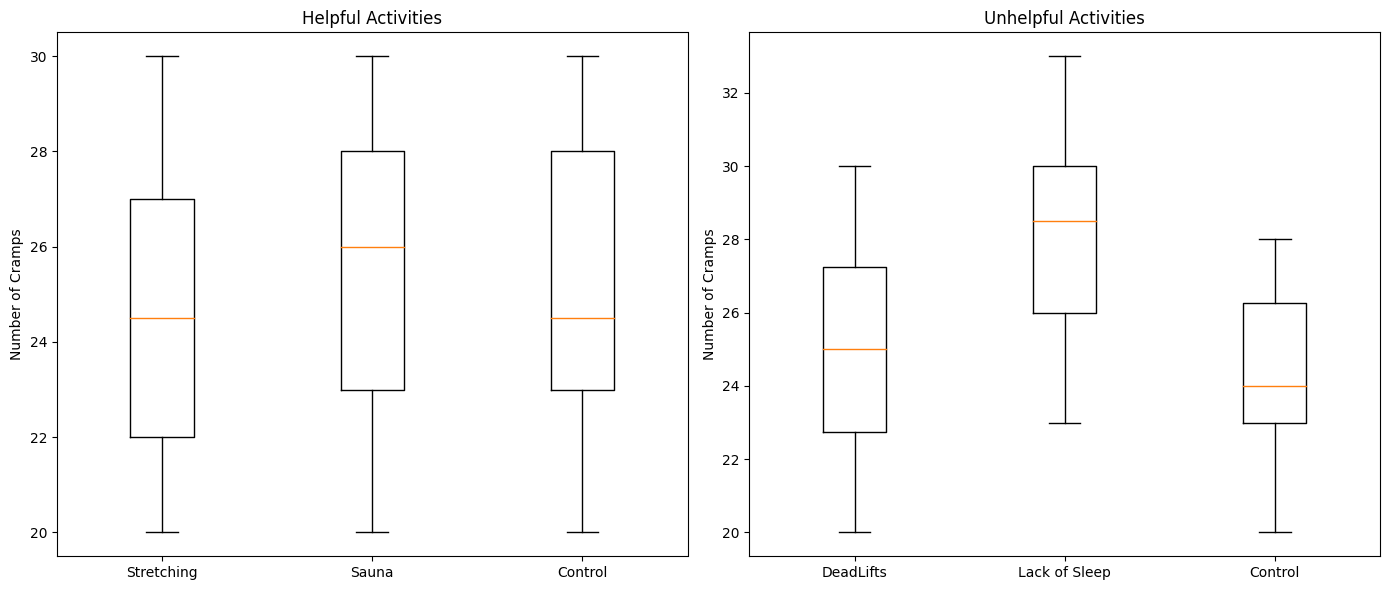

{'Helpful Activities ANOVA': {'F-statistic': 0.2677955789900629,
  'P-value': 0.7660213354559342},
 'Unhelpful Activities ANOVA': {'F-statistic': 12.47555117625324,
  'P-value': 3.2071671331127846e-05}}

In [101]:
from scipy.stats import f_oneway
import statsmodels.api as sm
import matplotlib.pyplot as plt

# --------------------Potential helpful activities------------------------------------------#
Stretching = [24, 28, 30, 27, 27, 26, 24, 22, 23, 21, 27, 29, 28, 26, 25, 24, 22, 22, 21, 20]
Sauna = [22, 24, 26, 23, 25, 28, 30, 27, 29, 26, 28, 22, 23, 21, 27, 29, 28, 26, 25, 20]
Control1 = [28 ,21 ,23 ,23 ,24 ,23 ,28 ,30 ,26 ,29 ,26 ,24 ,22 ,23 ,21 ,20 ,29 ,28 ,26 ,25]


#-------------------Potential unhelpful activities-------------------------------------------#
DeadLifts = [25, 28, 30, 27, 29, 26, 24, 22, 23, 21, 27, 29, 28, 26, 25, 24, 23, 22, 21, 20]
LackofSleep = [30, 31, 26, 28, 30, 25, 30, 27, 29, 26, 31, 28, 33, 29, 24, 29, 23, 32, 26, 28]
Control2 = [20 ,21 ,22 ,23 ,26 ,25 ,24 ,24 ,27 ,22 ,23 ,24 ,24 ,23 ,27 ,27 ,23 ,28 ,28 ,25]


# ANOVA for helpful activities
f_statistic1, p_value1 = f_oneway(Stretching, Sauna, Control1)

# ANOVA for unhelpful activities
f_statistic2, p_value2 = f_oneway(DeadLifts, LackofSleep, Control2)

# Results
results = {
    "Helpful Activities ANOVA": {"F-statistic": f_statistic1, "P-value": p_value1},
    "Unhelpful Activities ANOVA": {"F-statistic": f_statistic2, "P-value": p_value2}
}

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Helpful activities boxplot
axs[0].boxplot([Stretching, Sauna, Control1], labels=["Stretching", "Sauna", "Control"])
axs[0].set_title("Helpful Activities")
axs[0].set_ylabel("Number of Cramps")

# Unhelpful activities boxplot
axs[1].boxplot([DeadLifts, LackofSleep, Control2], labels=["DeadLifts", "Lack of Sleep", "Control"])
axs[1].set_title("Unhelpful Activities")
axs[1].set_ylabel("Number of Cramps")

plt.tight_layout()
plt.show()

results


*For the helpful activities cohort, did any activity had a significative effect on the number of cramps? What conclusions can be drawn from the results?*

Answer: The ANOVA did not indicate a significant difference between stretching, saun and control group because the p-value was 0.766, which is higher than 0.05.

This means that we do not have sufficient evidence to say that either stretching or sauna has a significative effect on the number of cramps experienced by professional cyclists compared to the control group.

*For the unhelpful activities cohort, did any activity had a significative effect on the number of cramps? What conclusions can be drawn from the results?*

Answer: The ANOVA indicated a significant difference among deadlifts, lack of Sleep and the control group, with a p-value of 0.00003 which is smaller than 0.05.

This means there is a statistically significant difference in the number of cramps experienced across these groups suggesting that one or both of these activities have a significant affect on the number of leg cramps.

4. Two-Factor Factorial Experiment Using a Randomized Block Design

MENSA conducted a 3 year-long pilot study in a large-sized school to understand if the method of teaching has a statistically significant effect on the SAT performs of high school students. They implement 3 different teaching methods, one for each year between 2020 and 2022. The metric for the teaching method is how many students out of a hundred where able to obtain a certain SAT score (sample value). With the aforementioned details, conduct a randomized block design study to test if the null hypothesis can be rejected (calculate F, p-unc, eps, and ng2). The data for this exercise is in the 'RBD.csv'. Use the pingouin module for this exercise.

- Null hypothesis (H0): The method of teaching does not have a statiscally significant effect on SAT score performance.
- Alternative hypothesis (H1): The method of teaching has a statiscally significant effect on SAT score performance.

Is it possible to reject the null hyphotesis? What is the relationship between the F-score and the p-value? Why is it important to have both?

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
! pip install pingouin

In [104]:
import pandas as pd
import pingouin as pg

df = pd.read_csv('/content/drive/MyDrive/MIE304/A8/RBD.csv')

def ANOVA_RBD(data):
    dfmelt = pd.melt(data, id_vars=['?'], var_name='?', value_name='?') #Suggestion: "melt" the dataframe

df

,SAT score,2022's Method,2021's Method,2020's Method
0,1600-1501,93.6,90.7,91.1
1,1550-1451,92.7,87.0,88.6
2,1500-1401,91.0,86.5,87.0
3,1450-1351,88.4,86.6,86.5
4,1400-1301,87.0,83.1,86.6
5,1350-1251,87.4,84.0,85.3
6,1300-1201,88.0,84.6,85.0
7,1250-1151,83.8,82.9,84.6
8,1200-1101,82.6,80.1,84.0
9,1150-1051,81.4,80.4,82.1


In [105]:
import pandas as pd
import pingouin as pg

# Assuming 'df' is your DataFrame
# Convert 'df' from wide to long format
df_long = pd.melt(df, id_vars=['SAT score'], value_vars=['2022\'s Method', '2021\'s Method', '2020\'s Method'],
                  var_name='Method', value_name='Percentage')

# Perform the repeated measures ANOVA
aov_results = pg.rm_anova(dv='Percentage', within='Method', subject='SAT score', data=df_long, detailed=True)

# Print the results
print(aov_results)


   Source         SS  DF         MS          F     p-unc       ng2       eps
0  Method  45.201667   2  22.600833  16.727278  0.000038  0.088758  0.759151
1   Error  29.725000  22   1.351136        NaN       NaN       NaN       NaN


*Is it possible to reject the null hyphotesis? What is the relationship between the F-score and the p-value? Why is it important to have both?*

Answer: Based on the ANOVa table it is possible to reject the null hypothesis. The p-value of 0.000038 shows thats the method of teaching does have a significant effect on SAT score performance. This statistical significance is confirmed by the F-score of 16.727278, which reflects the variance between group means relative to the variance within groups.

The F-score provides a measure of the magnitude of the effect of the relationship in your data, the p-value indicated if that relationship is statistically significant.

The F-score describes the extent of the variance between the groups that can be attributed to the treatment effect (in this case, the teaching method), while the p-value helps to determine the statistical significance of this variance. Together, they provide a comprehensive picture of the impact of the teaching methods on SAT scores.